In [311]:
"""
Kashi Vishwanath Bondugula
kbondugu@stevens.edu
Project - 1
"""

'\nKashi Vishwanath Bondugula\nkbondugu@stevens.edu\nProject - 1\n'

In [312]:
! pip install scikit-learn scipy matplotlib
! pip install pandas
! pip install numpy
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import sklearn as sk
import statsmodels.api as sm
%matplotlib inline

In [314]:
columns = ["s", "x", "y", "label"]
df_test = pd.read_csv('./Data_test.csv', names=columns)[1:]
df_train = pd.read_csv('./Data_train.csv', names=columns)[1:]

In [315]:
X_train = df_train.iloc[: , 1: 3]
X_train = np.array(X_train, dtype=float)
X_test = df_test.iloc[: , 1: 3]
X_test = np.array(X_test, dtype=float)
y_train = np.array(df_train['label'], dtype=int)
y_test = np.array(df_test['label'], dtype=int)

# Converting the labels into OVR -> One versus Rest, since logistic can only deal with binary
y_train_ovr = np.array([0 if y == 1 else 1 for y in y_train])
y_test_ovr = np.array([0 if y == 1 else 1 for y in y_test])

In [316]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [317]:
"""
Task 0: Naïve Logistic Regression [5 pts] 
Make a logistic regression and report the accuracy.
"""
class NLogisticRegression:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_predictions = np.dot(X, self.weights) + self.bias
            actual_predictions = sigmoid(linear_predictions)

            dw = (1 / n_samples) * np.dot(X.T, (actual_predictions - y))
            db = (1 / n_samples) * np.sum(actual_predictions - y)

            # Updating the weights and bias
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        return [0 if y<=0.5 else 1 for y in sigmoid(linear_predictions)]

In [318]:
logistic_classifier = NLogisticRegression(lr=0.1)
logistic_classifier.fit(X_train, y_train_ovr)
y_predicted = logistic_classifier.predict(X_test)
accuracy = np.sum(y_predicted == y_test_ovr) / len(y_test)
print("Accuracy of logistic regression is : ", accuracy)

Accuracy of logistic regression is :  0.6570666666666667


Initial Data


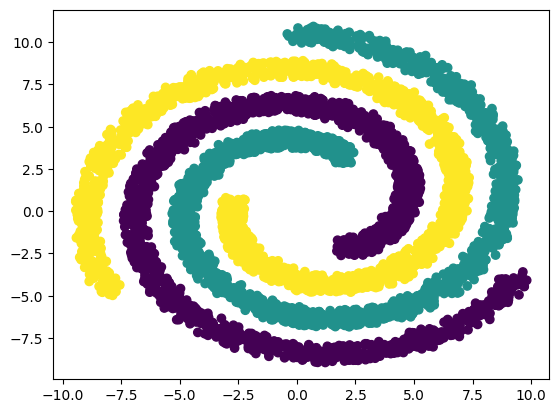

In [319]:
"""
Task 1: Train Data Transformation [30 pts]
Perform the pre-processing to transform the original data into a new feature space by doing feature 
engineering so the features are linear in the new space. Confirm four assumptions required for a 
linear classifier. 
"""
print("Initial Data")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

/tmp/ipykernel_13469/1556110006.py:2: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(np.log10(np.exp(X_train[:, 0])) / np.log10(np.exp(X_train[:, 1])))


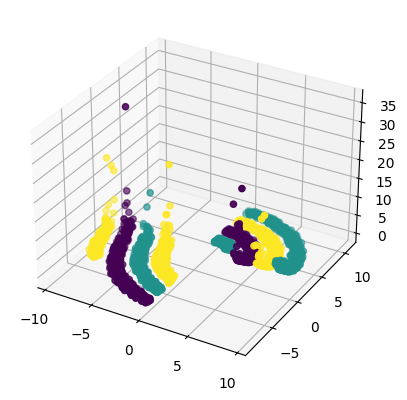

In [320]:
# Transformation 1 -- Fail
z = np.sqrt(np.log10(np.exp(X_train[:, 0])) / np.log10(np.exp(X_train[:, 1])))
ax = plt.axes(projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], z, c=y_train)

2741


/tmp/ipykernel_13469/2142599387.py:2: RuntimeWarning: invalid value encountered in sqrt
  z = np.cos(np.sqrt(np.log10(np.exp(X_train[:, 0])) / np.log10(np.exp(X_train[:, 1]))))


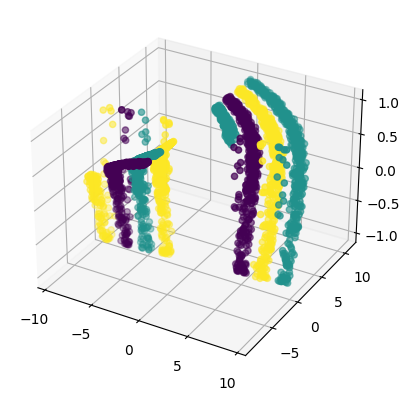

In [321]:
# Transformation 2 -- Too many Nan for z
z = np.cos(np.sqrt(np.log10(np.exp(X_train[:, 0])) / np.log10(np.exp(X_train[:, 1]))))
print(sum(np.isnan(z)))
ax = plt.axes(projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], z, c=y_train)

0


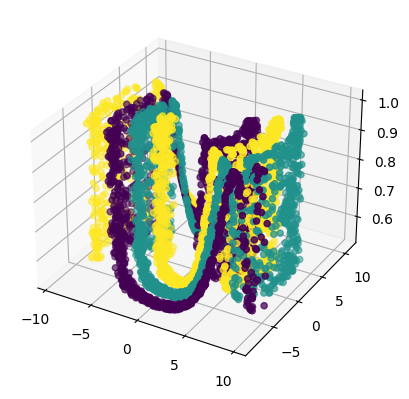

In [322]:
# Transformation 3 -- weird curves
z = np.cos(np.cos(np.square(np.log10(np.exp(X_train[:, 0])) / np.log10(np.exp(X_train[:, 1])))))
print(sum(np.isnan(z)))
ax = plt.axes(projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], z, c=y_train)

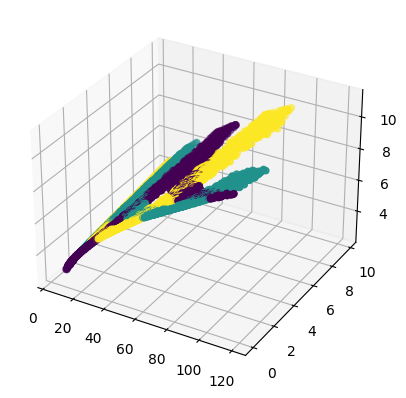

In [323]:
# Transformation 4
def cartesian_to_polar_conversion(x1, x2):
    return(np.sqrt(x1 ** 2 + x2 ** 2), np.arctan2(x2, x1))

x1_polar, x2_polar = cartesian_to_polar_conversion(X_train[:, 0], X_train[:, 1])
x1_transformed = np.square(x1_polar)
x2_transformed = np.square(x2_polar)
x3_transformed = np.sqrt(x1_transformed + x2_transformed)

x1_polar, x2_polar = cartesian_to_polar_conversion(X_test[:, 0], X_test[:, 1])
transformed_test_df = pd.DataFrame()
transformed_test_df["x1"] = np.square(x1_polar)
transformed_test_df["x2"] = np.square(x2_polar)
transformed_test_df["x3"] = np.sqrt(np.square(x1_polar) + np.square(x2_polar))

# Almost close to linear (Linearity Check)
ax = plt.axes(projection="3d")
ax.scatter(x1_transformed, x2_transformed, x3_transformed, c=y_train)

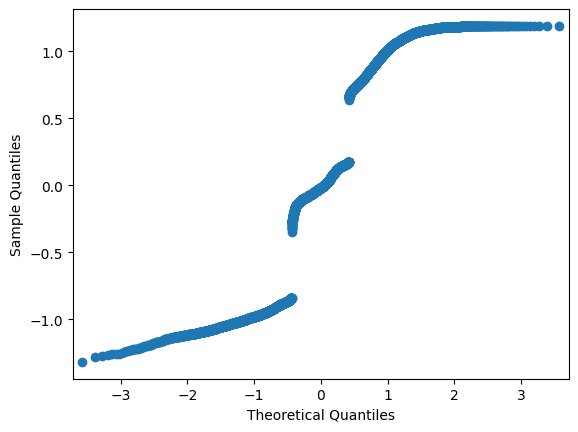

In [324]:
transformed_train_df = pd.DataFrame()
transformed_train_df['x1'] = x1_transformed
transformed_train_df['x2'] = x2_transformed
transformed_train_df['x3'] = x3_transformed

XT_train = transformed_train_df.iloc[: , 0: 4]
XT_test = transformed_test_df.iloc[: , 0: 4]

# Normality of the transformed data
model = sm.OLS(y_train, sm.add_constant(transformed_train_df))
sm.qqplot(model.fit().resid)
plt.show()

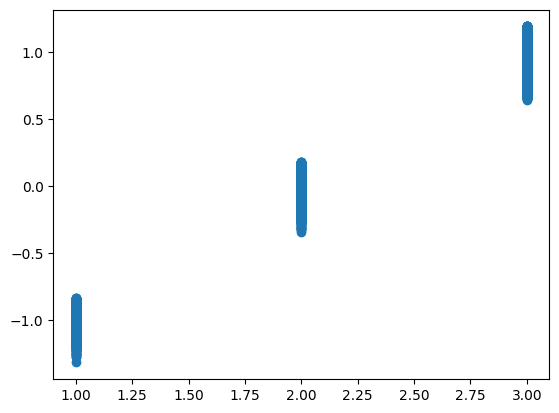

In [325]:
# Homoscedasticity
plt.scatter(y_train, model.fit().resid)

In [326]:
"""
Task 2: Linear Parametric Classification [10 pts]
Implement logistic regression model using Scikit-learn. Using the GridSearchCV, optimize the model. 
"""
class Task2:
    """
    2.1. Make a logistic regression model. Report the weights and the accuracy of the model.
    """
    def one(self, X_train, y_train_ovr, X_test, y_test_ovr):
        from sklearn.linear_model import LogisticRegression

        logistic_classifier = LogisticRegression()
        logistic_classifier.fit(X_train, y_train_ovr)
        y_predicted = logistic_classifier.predict(X_test)
        accuracy = np.sum(y_predicted == y_test_ovr) / len(y_test_ovr)
        print("Accuracy of sklearn logistic regression is :", accuracy)
        print("Weights of the sklearn logistic regression is :", logistic_classifier.coef_,
              " Bias is :", logistic_classifier.intercept_)

        return logistic_classifier


    """
    2.2. Using the GridSearchCV at various 100  values from  to , build a logistic regression model. 
    Visualize how the model accuracy behaviors. Then report the best model. If the accuracy is 100%, 
    then the model is overfitted. In this case, the model should be regularized. 
    """
    def two(self, logistic_classifier, X_train, y_train_ovr, title=""):
        c = np.linspace(1, 10**5, num=100)
        from sklearn.model_selection import GridSearchCV

        param_grid = {'C': c}
        g = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid)
        g.fit(X_train, y_train_ovr)
        print("The best model is :", g.best_params_,
              "with accuracy :", g.best_score_)

        scores = g.cv_results_['mean_test_score']
        plt2.scatter(x=scores, y=c, s=None)
        plt2.ylabel("Learning Rate")
        plt2.xlabel("Accuracy")

        return g


    """
    2.3. Using the best model, classify the test data set.
    """
    def three(self, g, X_test, y_test_ovr):
        from sklearn.metrics import accuracy_score

        predictions_x = g.best_estimator_.predict(X_test)
        print("The best model accuracy for test data using GridSearchCV is :",
              accuracy_score(predictions_x, y_test_ovr))


task2 = Task2()
lc = task2.one(X_train, y_train_ovr, X_test, y_test_ovr)

Accuracy of sklearn logistic regression is : 0.6570666666666667
Weights of the sklearn logistic regression is : [[0.0122343  0.06987057]]  Bias is : [0.68940611]


The best model is : {'C': 1.0} with accuracy : 0.6698666666666667


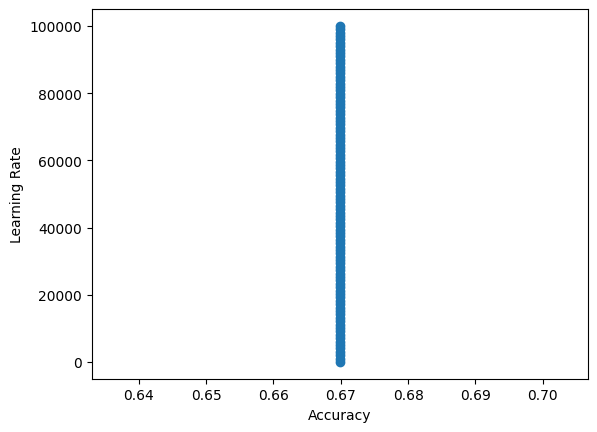

In [327]:
g = task2.two(lc, X_train, y_train_ovr)

In [328]:
task2.three(g, X_test, y_test_ovr)

The best model accuracy for test data using GridSearchCV is : 0.6570666666666667


In [329]:
# For transformed data
task2 = Task2()
lc = task2.one(XT_train, y_train_ovr, XT_test, y_test_ovr)

Accuracy of sklearn logistic regression is : 0.6570666666666667
Weights of the sklearn logistic regression is : [[ 0.07860382  0.13264517 -1.06377914]]  Bias is : [3.85129553]


The best model is : {'C': 1.0} with accuracy : 0.6698666666666667


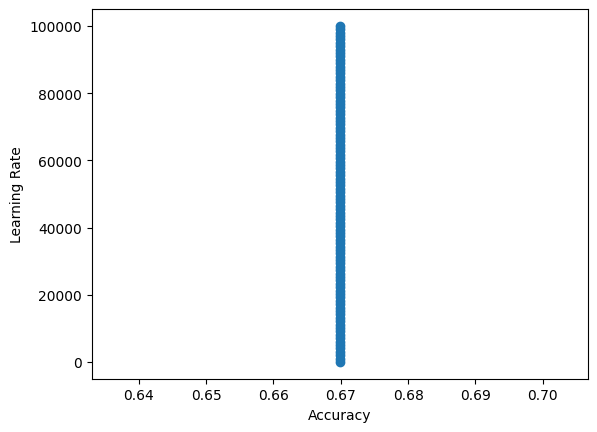

In [330]:
g = task2.two(lc, XT_train, y_train_ovr)

In [331]:
task2.three(g, XT_test, y_test_ovr)

The best model accuracy for test data using GridSearchCV is : 0.6570666666666667


In [332]:
"""
Task 3: Transformation using Kernel Method [20 pts]
Kernelize the original to a Kernel space using five different valid Kernel functions. 
Then repeat Task 2. 
"""
class Kernel:
    def __init__(self, x1, x2, c):
        self.x1 = x1
        self.x2 = x2
        self.c = c    
    
    def sigmoid_kernel(self, alpha, a, con):
        kernel = []

        for i in range(len(self.x1)):
            temp = np.tanh(np.dot(self.x1[i] * alpha, self.x2[i] * a) + con)
            kernel.append(temp)

        df = pd.DataFrame()
        df['x1'] = self.x1
        df['x2'] = self.x2
        df['x3'] = kernel

        return np.array(df.iloc[: , : 3], dtype=float)

    def polynomial_kernel(self, degree=3):
        kernel = []

        for i in range(len(self.x1)):
            kernel.append(((np.dot(self.x1[i], self.x2[i])) + 1) ** degree)

        df = pd.DataFrame()
        df['x1'] = self.x1
        df['x2'] = self.x2
        df['x3'] = kernel

        return np.array(df.iloc[: , : 3], dtype=float)
    
    def rbf_kernel(self):
        gamma = -0.567
        kernel = np.exp(-gamma * (np.square(self.x1 - self.x2)))

        df = pd.DataFrame()
        df['x1'] = self.x1
        df['x2'] = self.x2
        df['x3'] = kernel

        return np.array(df.iloc[: , : 3], dtype=float)

    def fourier_kernel(self):
        self._q = 0.1

        kernel = ((1-self._q ** 2) / \
                    (2.*(1. - 2.*self._q *np.cos(self.x1 - self.x2.T) + self._q ** 2)))

        df = pd.DataFrame()
        df['x1'] = self.x1
        df['x2'] = self.x2
        df['x3'] = kernel

        return np.array(df.iloc[: , : 3], dtype=float)

    def gaussian_kernel(self):
        x = np.c_[(self.x1, self.x2)]
        if len(x) > 2:
            x_1 = x[:, 0] ** 2
            x_2 = np.sqrt(2) * x[:, 0] * x[:, 1]
            x_3 = x[:, 1] ** 2
        else:
            x_1 = x[0] ** 2
            x_2 = np.sqrt(2) * x[0] * x[1]
            x_3 = x[1] ** 2
        
        df = pd.DataFrame()
        df['x1'] = x_1
        df['x2'] = x_2
        df['x3'] = x_3
        
        return np.array(df.iloc[: , : 3], dtype=float)


In [333]:
kernel_train = Kernel(X_train[:, 0], X_train[:, 1], y_train)
kernel_test = Kernel(X_test[:, 0], X_test[:, 1], y_test)

Accuracy of sklearn logistic regression is : 0.6570666666666667
Weights of the sklearn logistic regression is : [[ 0.00671585  0.00917945 -0.00246732]]  Bias is : [0.62114228]
The best model is : {'C': 1.0} with accuracy : 0.6698666666666667
The best model accuracy for test data using GridSearchCV is : 0.6570666666666667


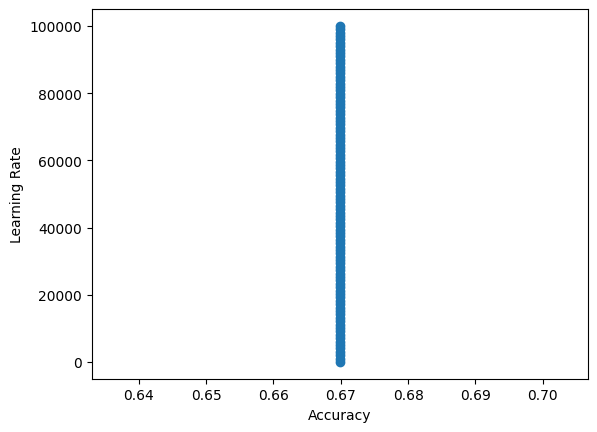

In [334]:
gaussian_kernel_train_coordinates = kernel_train.gaussian_kernel()
gaussian_kernel_test_coordinates = kernel_test.gaussian_kernel()

task2 = Task2()
lc = task2.one(gaussian_kernel_train_coordinates, y_train_ovr,
               gaussian_kernel_test_coordinates, y_test_ovr)
g = task2.two(lc, gaussian_kernel_train_coordinates, y_train_ovr)
task2.three(g, gaussian_kernel_test_coordinates, y_test_ovr)

Accuracy of sklearn logistic regression is : 0.6570666666666667
Weights of the sklearn logistic regression is : [[0.01310847 0.0678009  0.08644163]]  Bias is : [0.68215752]
The best model is : {'C': 1.0} with accuracy : 0.6702222222222223
The best model accuracy for test data using GridSearchCV is : 0.6570666666666667


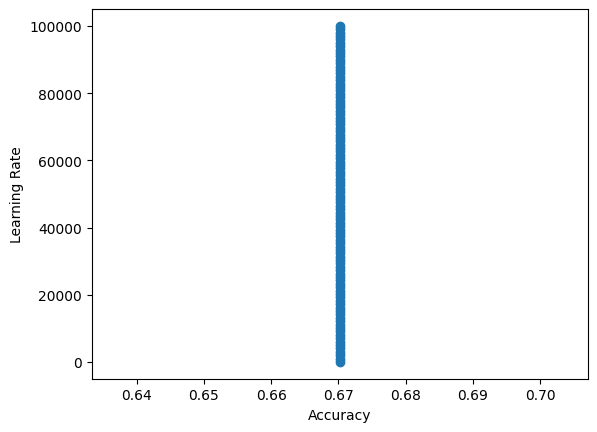

In [335]:
sigmoid_kernel_train_coordinates = kernel_train.sigmoid_kernel(0.5, 1, 1)
sigmoid_kernel_test_coordinates = kernel_test.sigmoid_kernel(0.5, 1, 1)

task2 = Task2()
lc = task2.one(sigmoid_kernel_train_coordinates, y_train_ovr,
               sigmoid_kernel_test_coordinates, y_test_ovr)
g = task2.two(lc, sigmoid_kernel_train_coordinates, y_train_ovr)
# plt.title()
task2.three(g, sigmoid_kernel_test_coordinates, y_test_ovr)


Accuracy of sklearn logistic regression is : 0.6805333333333333
Weights of the sklearn logistic regression is : [[1.74399980e-02 4.68843772e-02 1.83523198e-05]]  Bias is : [0.7098613]
The best model is : {'C': 1.0} with accuracy : 0.7009777777777778
The best model accuracy for test data using GridSearchCV is : 0.6805333333333333


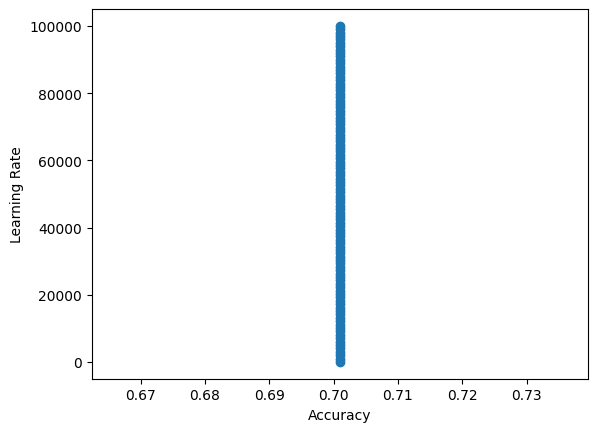

In [336]:
polynomial_kernel_train_coordinates = kernel_train.polynomial_kernel()
polynomial_kernel_test_coordinates = kernel_test.polynomial_kernel()

task2 = Task2()
lc = task2.one(polynomial_kernel_train_coordinates, y_train_ovr,
               polynomial_kernel_test_coordinates, y_test_ovr)
g = task2.two(lc, polynomial_kernel_train_coordinates, y_train_ovr)
task2.three(g, polynomial_kernel_test_coordinates, y_test_ovr)


Accuracy of sklearn logistic regression is : 0.6672
Weights of the sklearn logistic regression is : [[0.01287607 0.07075301 1.69656398]]  Bias is : [-0.15946517]
The best model is : {'C': 1011.0909090909091} with accuracy : 0.6848
The best model accuracy for test data using GridSearchCV is : 0.6725333333333333


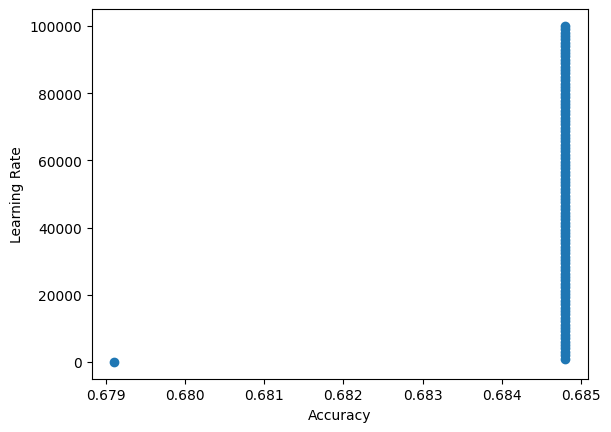

In [337]:
fourier_kernel_train_coordinates = kernel_train.fourier_kernel()
fourier_kernel_test_coordinates = kernel_test.fourier_kernel()

task2 = Task2()
lc = task2.one(fourier_kernel_train_coordinates, y_train_ovr,
               fourier_kernel_test_coordinates, y_test_ovr)
g = task2.two(lc, fourier_kernel_train_coordinates, y_train_ovr)
task2.three(g, fourier_kernel_test_coordinates, y_test_ovr)


Accuracy of sklearn logistic regression is : 0.3429333333333333
Weights of the sklearn logistic regression is : [[0. 0. 0.]]  Bias is : [0.]


/home/z/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/z/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

The best model is : {'C': 1.0} with accuracy : 0.3301333333333333
The best model accuracy for test data using GridSearchCV is : 0.3429333333333333


/home/z/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/z/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

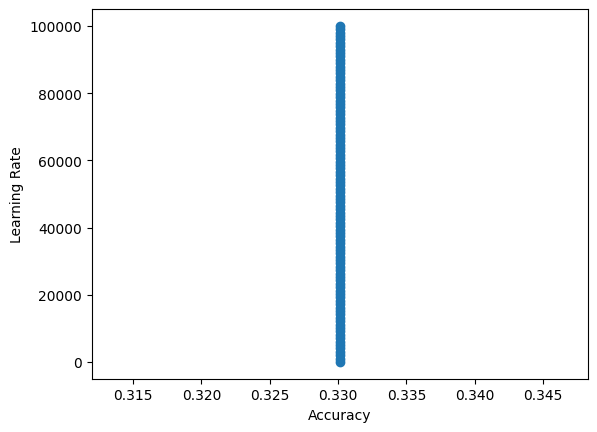

In [338]:
rbf_kernel_train_coordinates = kernel_train.rbf_kernel()
rbf_kernel_test_coordinates = kernel_test.rbf_kernel()

task2 = Task2()
lc = task2.one(rbf_kernel_train_coordinates, y_train_ovr,
               rbf_kernel_test_coordinates, y_test_ovr)
g = task2.two(lc, rbf_kernel_train_coordinates, y_train_ovr)
task2.three(g, rbf_kernel_test_coordinates, y_test_ovr)

Accuracy for K : 1 is : 1.0
Accuracy for K : 2 is : 1.0
Accuracy for K : 3 is : 1.0
Accuracy for K : 4 is : 1.0
Accuracy for K : 5 is : 1.0
Accuracy for K : 6 is : 1.0
Accuracy for K : 7 is : 1.0
Accuracy for K : 8 is : 1.0
Accuracy for K : 9 is : 1.0
Accuracy for K : 10 is : 1.0
Accuracy for K : 11 is : 1.0
Accuracy for K : 12 is : 1.0
Accuracy for K : 13 is : 1.0
Accuracy for K : 14 is : 1.0
Accuracy for K : 15 is : 1.0
Accuracy for K : 16 is : 1.0
Accuracy for K : 17 is : 1.0
Accuracy for K : 18 is : 1.0
Accuracy for K : 19 is : 1.0
Accuracy for K : 20 is : 1.0
Accuracy for K : 21 is : 1.0
Accuracy for K : 22 is : 1.0
Accuracy for K : 23 is : 1.0
Accuracy for K : 24 is : 1.0
Accuracy for K : 25 is : 1.0
Accuracy for K : 26 is : 1.0
Accuracy for K : 27 is : 1.0
Accuracy for K : 28 is : 1.0
Accuracy for K : 29 is : 1.0
Accuracy for K : 30 is : 1.0
Accuracy for K : 31 is : 1.0
Accuracy for K : 32 is : 1.0
Accuracy for K : 33 is : 1.0
Accuracy for K : 34 is : 1.0
Accuracy for K : 35 is 

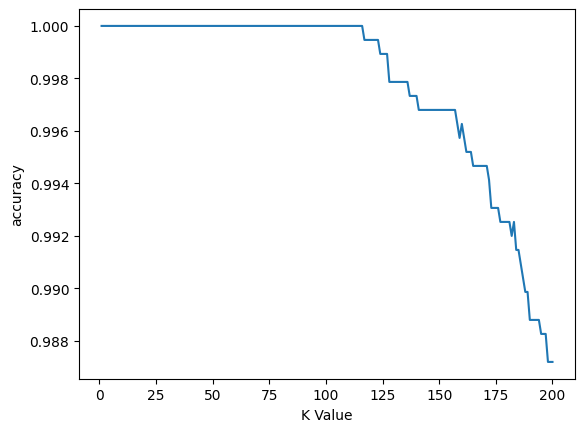

In [339]:
"""
Task 4: Non-parametric KNN Classification [15 pts]
    1. Classify the original data with K values from 1 to 200. Then report the 
    accuracy with visualization. 
    2. Repeat step 1 with the final train data sets from Tasks 1 and 3. 
"""
def task4_1(X_train, y_train, X_test, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    knn_accuracies = []
    K_values = range(1, 201)
    for K in range(1, 201):
        knn_model = KNeighborsClassifier(n_neighbors=K)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy = accuracy_score(knn_predictions, y_test)
        knn_accuracies.append(knn_accuracy)
        print("Accuracy for K :", K, "is :", knn_accuracy)
    
    plt.plot(K_values, knn_accuracies)
    plt.xlabel("K Value")
    plt.ylabel("accuracy")

task4_1(X_train, y_train, X_test, y_test)

Using Task 1 Data
Accuracy for K : 1 is : 0.8602666666666666
Accuracy for K : 2 is : 0.8565333333333334
Accuracy for K : 3 is : 0.8698666666666667
Accuracy for K : 4 is : 0.8544
Accuracy for K : 5 is : 0.8602666666666666
Accuracy for K : 6 is : 0.8570666666666666
Accuracy for K : 7 is : 0.8597333333333333
Accuracy for K : 8 is : 0.856
Accuracy for K : 9 is : 0.8602666666666666
Accuracy for K : 10 is : 0.8570666666666666
Accuracy for K : 11 is : 0.8602666666666666
Accuracy for K : 12 is : 0.8581333333333333
Accuracy for K : 13 is : 0.8629333333333333
Accuracy for K : 14 is : 0.8618666666666667
Accuracy for K : 15 is : 0.8565333333333334
Accuracy for K : 16 is : 0.8549333333333333
Accuracy for K : 17 is : 0.8538666666666667
Accuracy for K : 18 is : 0.8522666666666666
Accuracy for K : 19 is : 0.8554666666666667
Accuracy for K : 20 is : 0.8554666666666667
Accuracy for K : 21 is : 0.8522666666666666
Accuracy for K : 22 is : 0.8538666666666667
Accuracy for K : 23 is : 0.8597333333333333
Accu

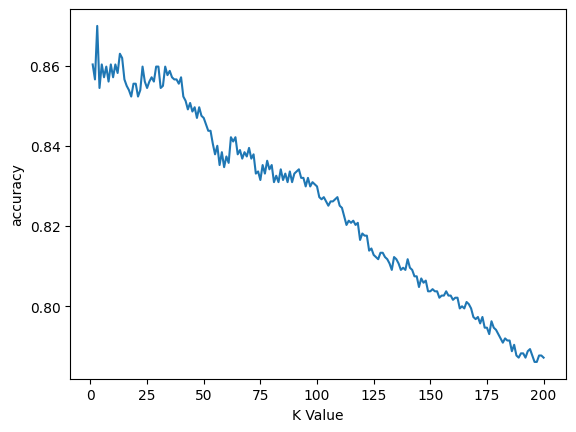

In [340]:
"""
4.2. Repeat step 1 with the final train data sets from Tasks 1 and 3.
"""
print("Using Task 1 Data")
task4_1(XT_train, y_train, XT_test, y_test)

Gaussian Kernel
Accuracy for K : 1 is : 0.6938666666666666
Accuracy for K : 2 is : 0.7002666666666667
Accuracy for K : 3 is : 0.7066666666666667
Accuracy for K : 4 is : 0.7194666666666667
Accuracy for K : 5 is : 0.7152
Accuracy for K : 6 is : 0.7253333333333334
Accuracy for K : 7 is : 0.7210666666666666
Accuracy for K : 8 is : 0.7258666666666667
Accuracy for K : 9 is : 0.7328
Accuracy for K : 10 is : 0.7333333333333333
Accuracy for K : 11 is : 0.7312
Accuracy for K : 12 is : 0.7429333333333333
Accuracy for K : 13 is : 0.7370666666666666
Accuracy for K : 14 is : 0.7445333333333334
Accuracy for K : 15 is : 0.7392
Accuracy for K : 16 is : 0.7381333333333333
Accuracy for K : 17 is : 0.7365333333333334
Accuracy for K : 18 is : 0.7370666666666666
Accuracy for K : 19 is : 0.7290666666666666
Accuracy for K : 20 is : 0.7306666666666667
Accuracy for K : 21 is : 0.7264
Accuracy for K : 22 is : 0.7301333333333333
Accuracy for K : 23 is : 0.7344
Accuracy for K : 24 is : 0.7328
Accuracy for K : 25 i

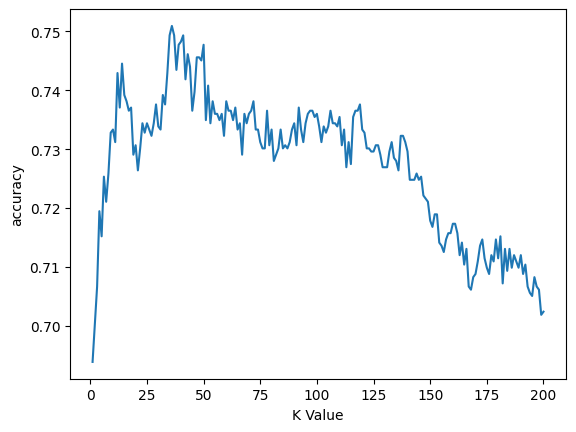

In [341]:
print("Gaussian Kernel")
task4_1(gaussian_kernel_train_coordinates, y_train,
        gaussian_kernel_test_coordinates, y_test)


Sigmoid Kernel
Accuracy for K : 1 is : 1.0
Accuracy for K : 2 is : 1.0
Accuracy for K : 3 is : 1.0
Accuracy for K : 4 is : 1.0
Accuracy for K : 5 is : 1.0
Accuracy for K : 6 is : 1.0
Accuracy for K : 7 is : 1.0
Accuracy for K : 8 is : 1.0
Accuracy for K : 9 is : 1.0
Accuracy for K : 10 is : 1.0
Accuracy for K : 11 is : 1.0
Accuracy for K : 12 is : 1.0
Accuracy for K : 13 is : 1.0
Accuracy for K : 14 is : 1.0
Accuracy for K : 15 is : 1.0
Accuracy for K : 16 is : 1.0
Accuracy for K : 17 is : 1.0
Accuracy for K : 18 is : 1.0
Accuracy for K : 19 is : 1.0
Accuracy for K : 20 is : 1.0
Accuracy for K : 21 is : 1.0
Accuracy for K : 22 is : 1.0
Accuracy for K : 23 is : 1.0
Accuracy for K : 24 is : 1.0
Accuracy for K : 25 is : 1.0
Accuracy for K : 26 is : 1.0
Accuracy for K : 27 is : 1.0
Accuracy for K : 28 is : 1.0
Accuracy for K : 29 is : 1.0
Accuracy for K : 30 is : 1.0
Accuracy for K : 31 is : 1.0
Accuracy for K : 32 is : 1.0
Accuracy for K : 33 is : 1.0
Accuracy for K : 34 is : 1.0
Accuracy

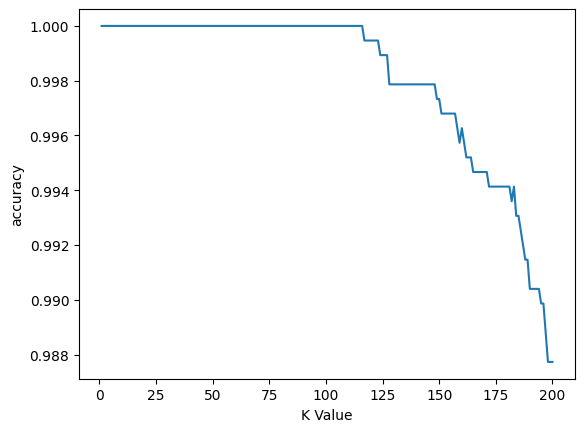

In [342]:
print("Sigmoid Kernel")
task4_1(sigmoid_kernel_train_coordinates, y_train,
        sigmoid_kernel_test_coordinates, y_test)

Polynomial Kernel
Accuracy for K : 1 is : 0.632
Accuracy for K : 2 is : 0.5925333333333334
Accuracy for K : 3 is : 0.5968
Accuracy for K : 4 is : 0.5744
Accuracy for K : 5 is : 0.5744
Accuracy for K : 6 is : 0.5701333333333334
Accuracy for K : 7 is : 0.5738666666666666
Accuracy for K : 8 is : 0.5674666666666667
Accuracy for K : 9 is : 0.5728
Accuracy for K : 10 is : 0.5610666666666667
Accuracy for K : 11 is : 0.5621333333333334
Accuracy for K : 12 is : 0.5621333333333334
Accuracy for K : 13 is : 0.5664
Accuracy for K : 14 is : 0.5605333333333333
Accuracy for K : 15 is : 0.5610666666666667
Accuracy for K : 16 is : 0.5594666666666667
Accuracy for K : 17 is : 0.5626666666666666
Accuracy for K : 18 is : 0.5616
Accuracy for K : 19 is : 0.5637333333333333
Accuracy for K : 20 is : 0.5605333333333333
Accuracy for K : 21 is : 0.5621333333333334
Accuracy for K : 22 is : 0.5642666666666667
Accuracy for K : 23 is : 0.5728
Accuracy for K : 24 is : 0.5690666666666667
Accuracy for K : 25 is : 0.57173

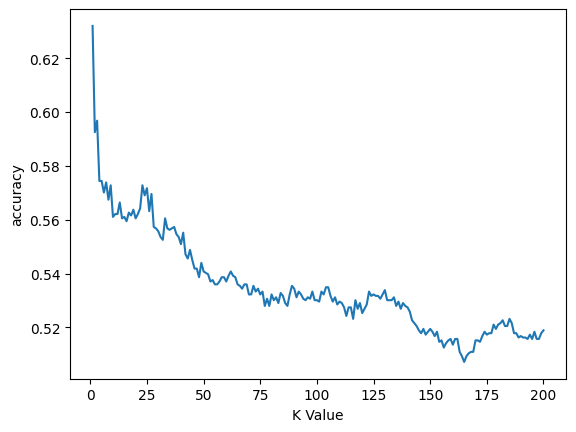

In [343]:
print("Polynomial Kernel")
task4_1(polynomial_kernel_train_coordinates, y_train,
        polynomial_kernel_test_coordinates, y_test)

RBF Kernel
Accuracy for K : 1 is : 0.5338666666666667
Accuracy for K : 2 is : 0.5253333333333333
Accuracy for K : 3 is : 0.5328
Accuracy for K : 4 is : 0.536
Accuracy for K : 5 is : 0.5562666666666667
Accuracy for K : 6 is : 0.5429333333333334
Accuracy for K : 7 is : 0.5461333333333334
Accuracy for K : 8 is : 0.5525333333333333
Accuracy for K : 9 is : 0.5466666666666666
Accuracy for K : 10 is : 0.5477333333333333
Accuracy for K : 11 is : 0.5456
Accuracy for K : 12 is : 0.5546666666666666
Accuracy for K : 13 is : 0.552
Accuracy for K : 14 is : 0.5488
Accuracy for K : 15 is : 0.5562666666666667
Accuracy for K : 16 is : 0.5578666666666666
Accuracy for K : 17 is : 0.5568
Accuracy for K : 18 is : 0.5562666666666667
Accuracy for K : 19 is : 0.5504
Accuracy for K : 20 is : 0.5610666666666667
Accuracy for K : 21 is : 0.5573333333333333
Accuracy for K : 22 is : 0.5568
Accuracy for K : 23 is : 0.5573333333333333
Accuracy for K : 24 is : 0.56
Accuracy for K : 25 is : 0.5653333333333334
Accuracy f

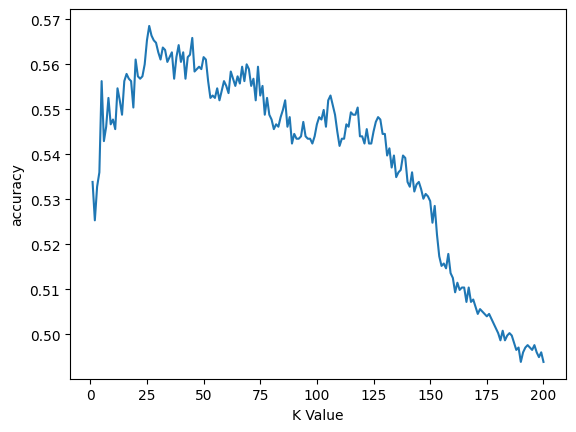

In [344]:
print("RBF Kernel")
task4_1(rbf_kernel_train_coordinates, y_train,
        rbf_kernel_test_coordinates, y_test)

Fourier Kernel
Accuracy for K : 1 is : 1.0
Accuracy for K : 2 is : 1.0
Accuracy for K : 3 is : 1.0
Accuracy for K : 4 is : 1.0
Accuracy for K : 5 is : 1.0
Accuracy for K : 6 is : 1.0
Accuracy for K : 7 is : 1.0
Accuracy for K : 8 is : 1.0
Accuracy for K : 9 is : 1.0
Accuracy for K : 10 is : 1.0
Accuracy for K : 11 is : 1.0
Accuracy for K : 12 is : 1.0
Accuracy for K : 13 is : 1.0
Accuracy for K : 14 is : 1.0
Accuracy for K : 15 is : 1.0
Accuracy for K : 16 is : 1.0
Accuracy for K : 17 is : 1.0
Accuracy for K : 18 is : 1.0
Accuracy for K : 19 is : 1.0
Accuracy for K : 20 is : 1.0
Accuracy for K : 21 is : 1.0
Accuracy for K : 22 is : 1.0
Accuracy for K : 23 is : 1.0
Accuracy for K : 24 is : 1.0
Accuracy for K : 25 is : 1.0
Accuracy for K : 26 is : 1.0
Accuracy for K : 27 is : 1.0
Accuracy for K : 28 is : 1.0
Accuracy for K : 29 is : 1.0
Accuracy for K : 30 is : 1.0
Accuracy for K : 31 is : 1.0
Accuracy for K : 32 is : 1.0
Accuracy for K : 33 is : 1.0
Accuracy for K : 34 is : 1.0
Accuracy

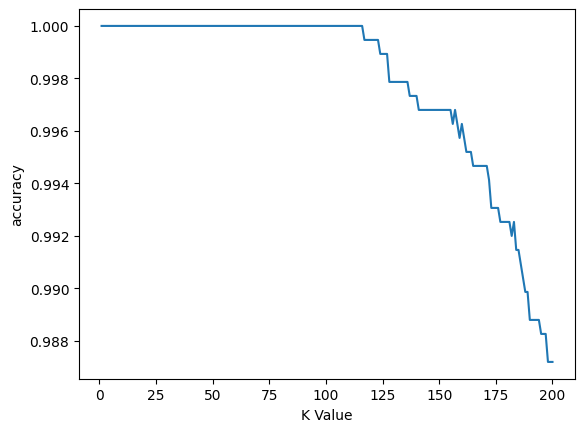

In [345]:
print("Fourier Kernel")
task4_1(fourier_kernel_train_coordinates, y_train,
        fourier_kernel_test_coordinates, y_test)